In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.grid import RegularAxis, FFTRegularAxis, RFFTRegularAxis, RegularGrid

In [3]:
p = Phantom()

In [4]:
na = 100
thetas_deg = RegularAxis(0, 180/na, na)

nt = 100
t_axis = FFTRegularAxis(nt, d=1/2)

grid = RegularGrid(thetas_deg, t_axis)

In [5]:
S = p.sinogram(grid)
S_rect = p.sinogram(grid, rect=True)

<IPython.core.display.Javascript object>


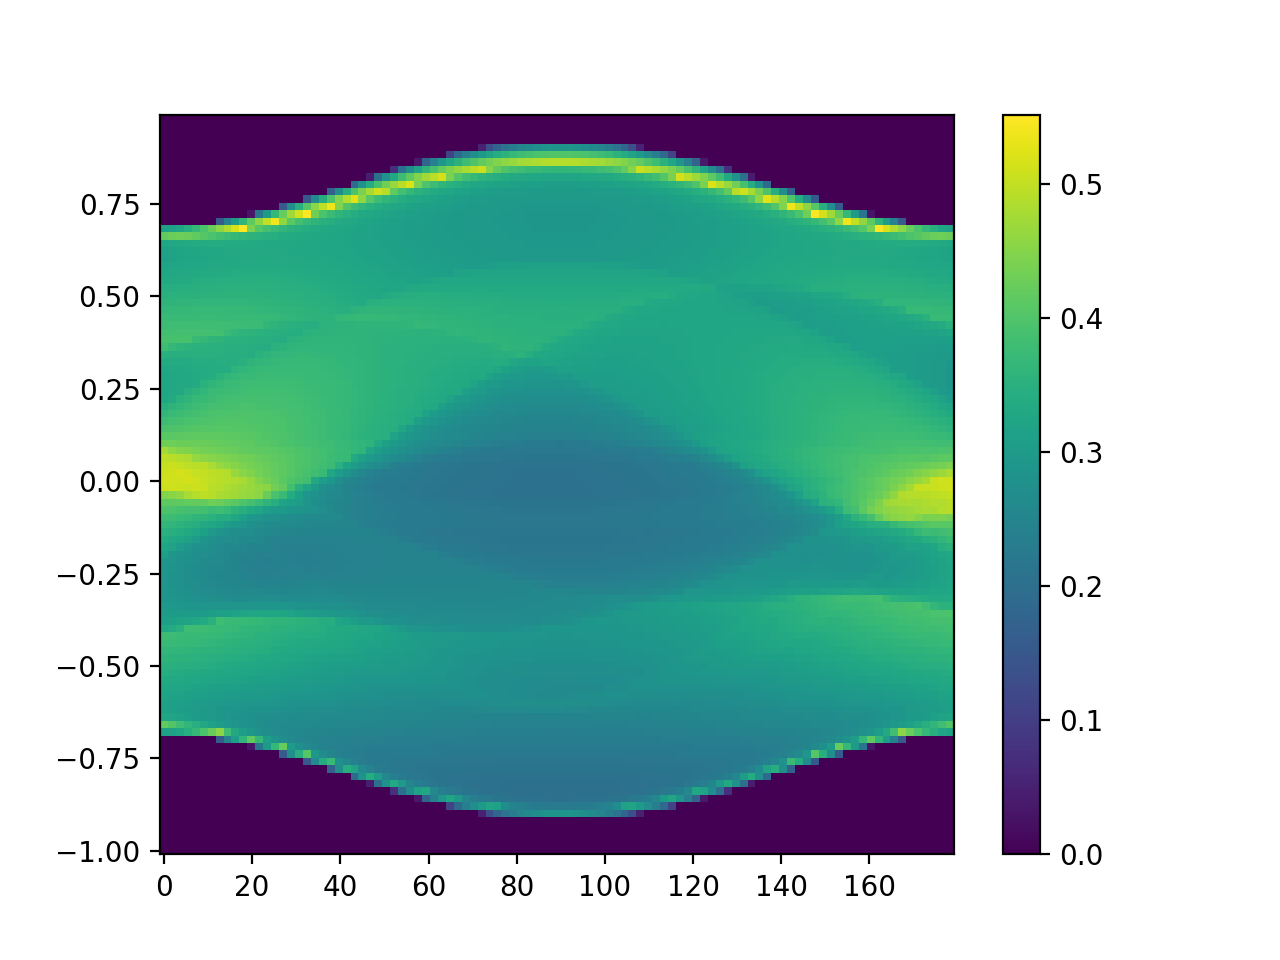

In [6]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S, aspect='auto')
fig.colorbar(im);

<IPython.core.display.Javascript object>


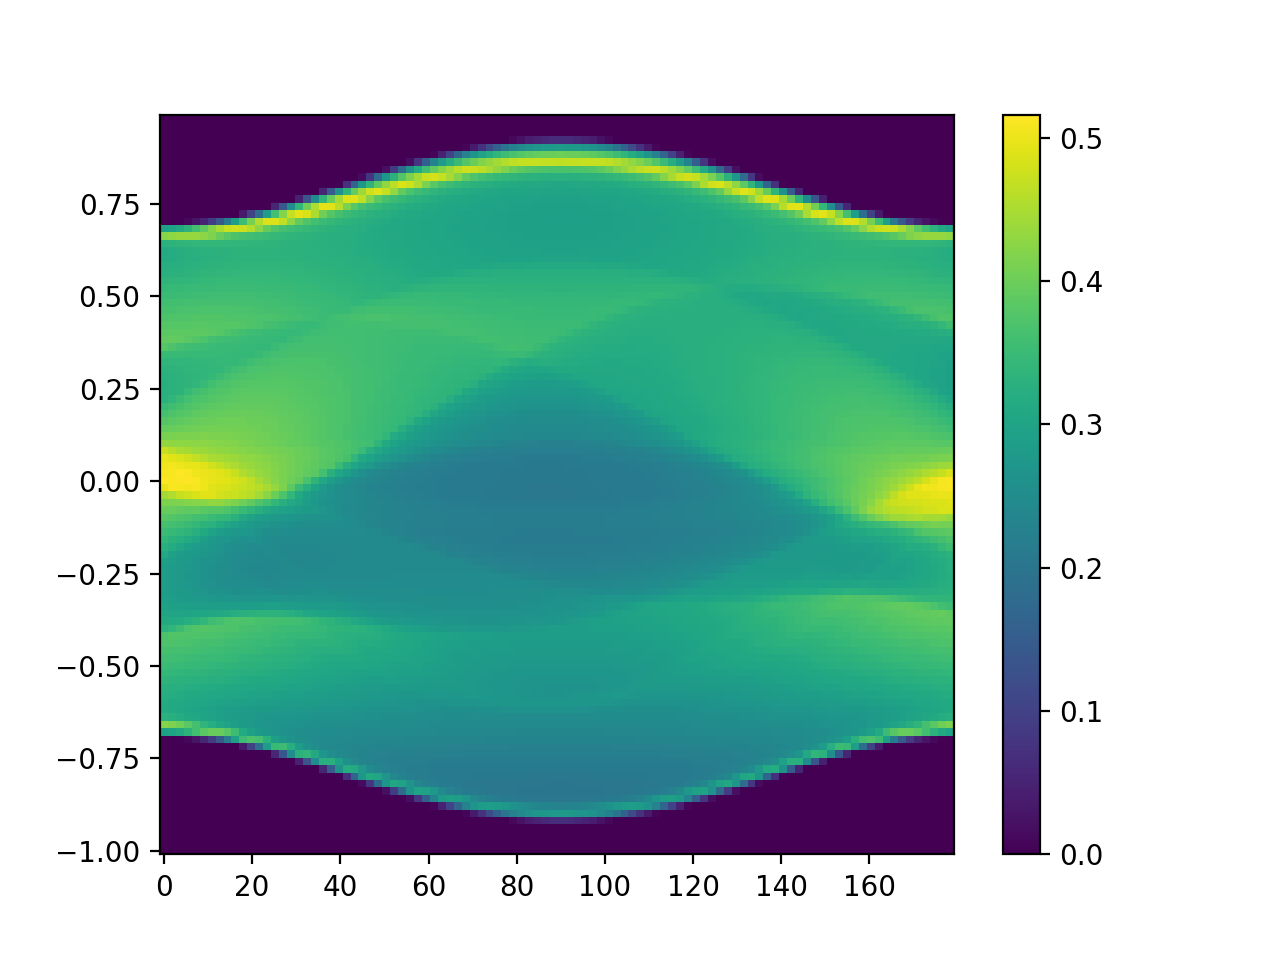

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S_rect, aspect='auto')
fig.colorbar(im);

In [8]:
S_ft_grid, S_ft = grid.ft(S, axis=0)

<IPython.core.display.Javascript object>


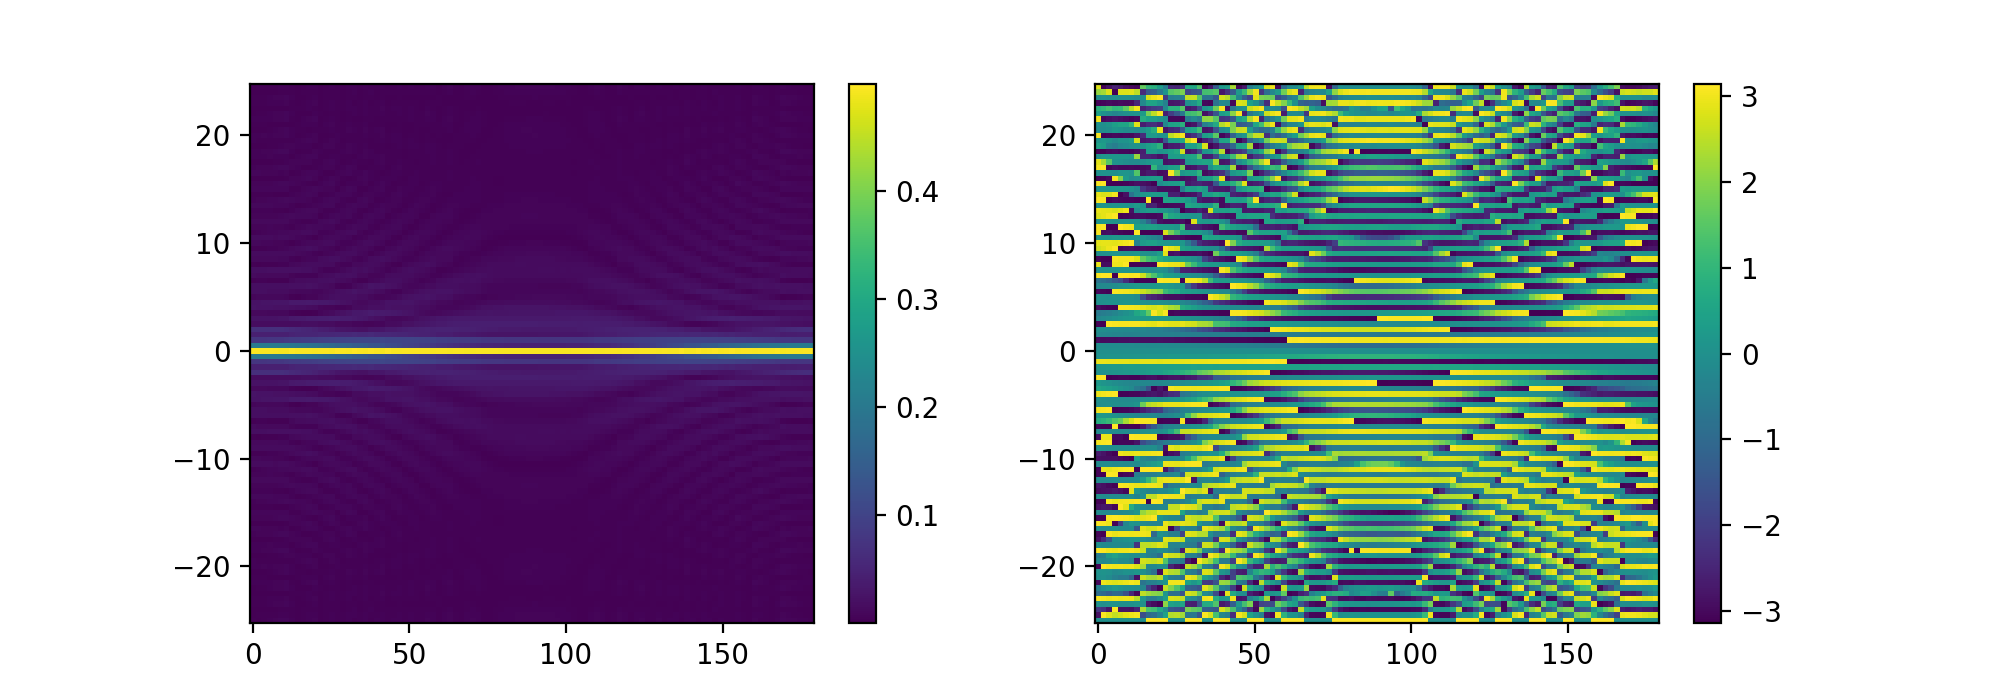

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_ft_grid.imshow(ax[0], np.abs(S_ft), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_ft_grid.imshow(ax[1], np.angle(S_ft), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [10]:
S_ft_rect_grid, S_ft_rect = grid.ft(S_rect, axis=0)

<IPython.core.display.Javascript object>


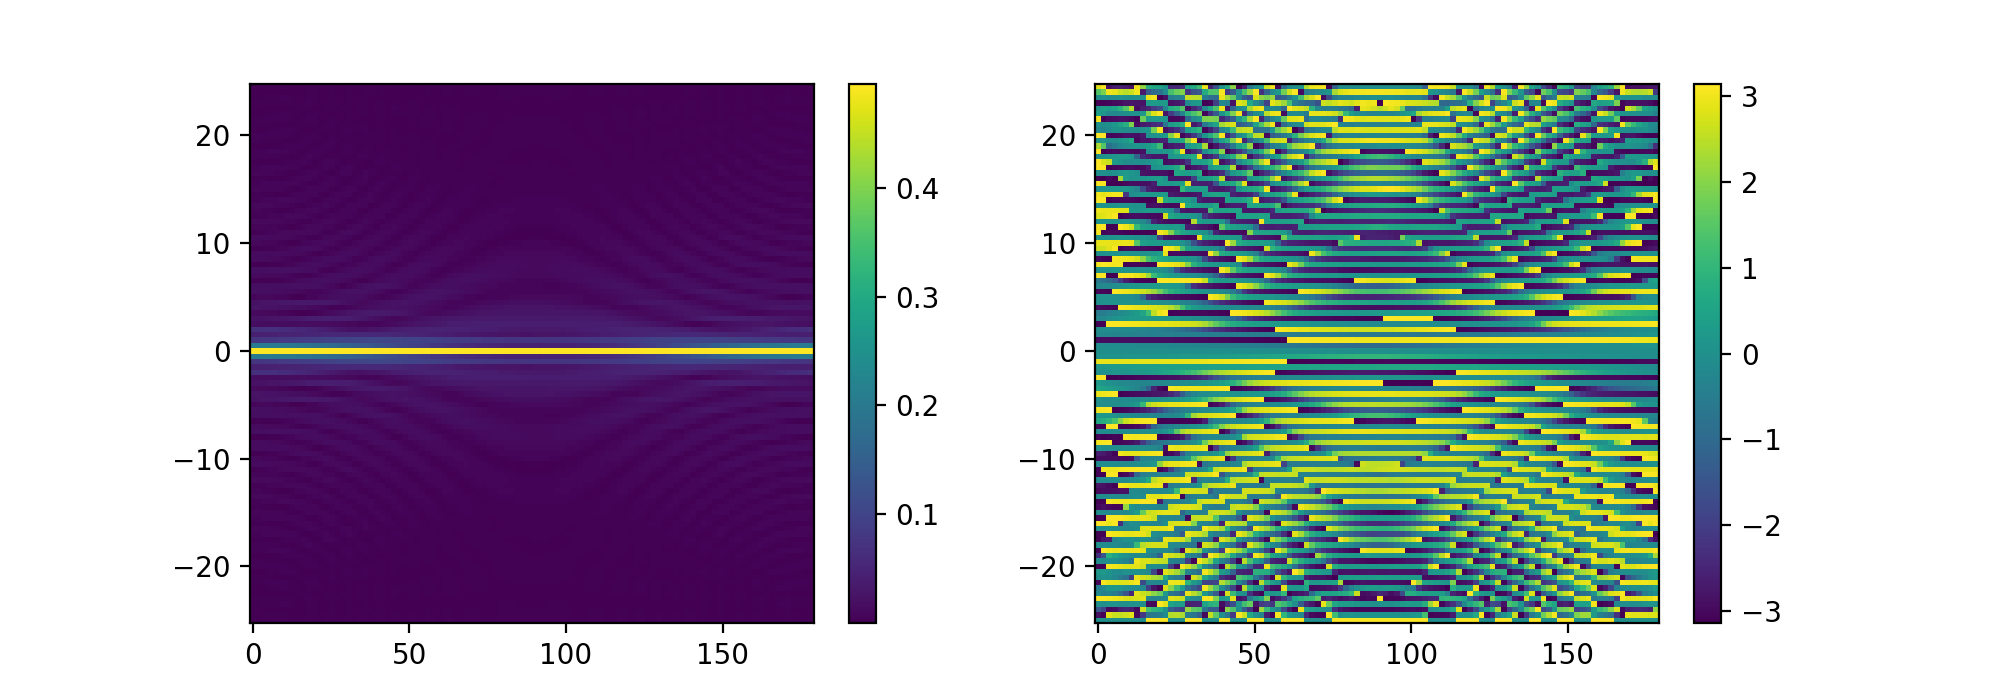

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_ft_rect_grid.imshow(ax[0], np.abs(S_ft_rect), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_ft_rect_grid.imshow(ax[1], np.angle(S_ft_rect), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [12]:
S_ft_theory = p.proj_ft(S_ft_grid)

<IPython.core.display.Javascript object>


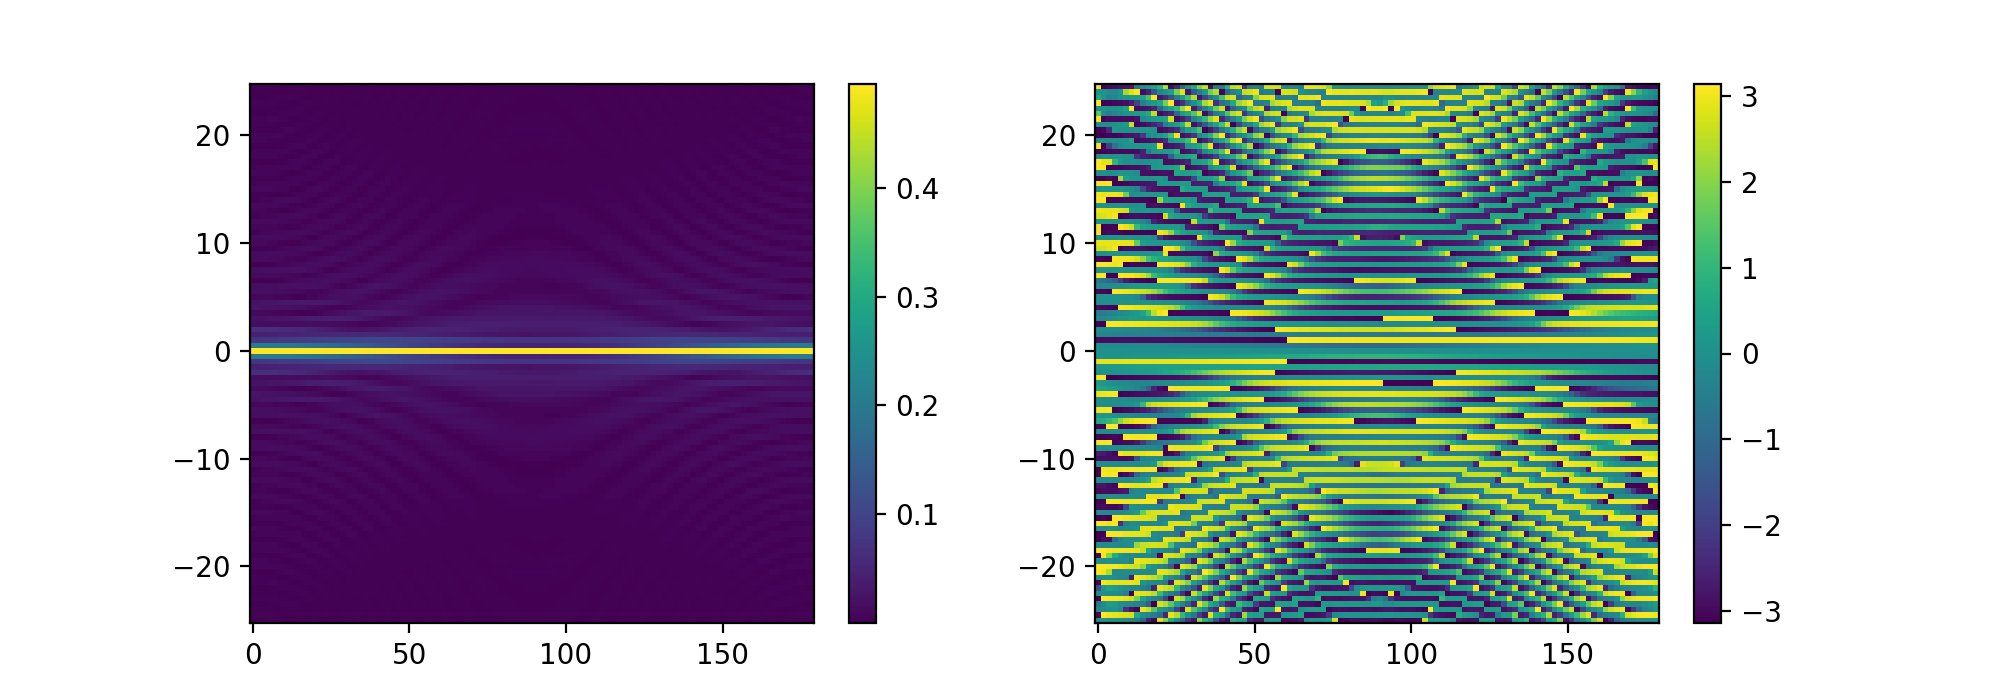

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_ft_grid.imshow(ax[0], np.abs(S_ft_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_ft_grid.imshow(ax[1], np.angle(S_ft_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [14]:
S_ft_rect_theory = p.proj_ft(S_ft_grid, rect=True)

<IPython.core.display.Javascript object>


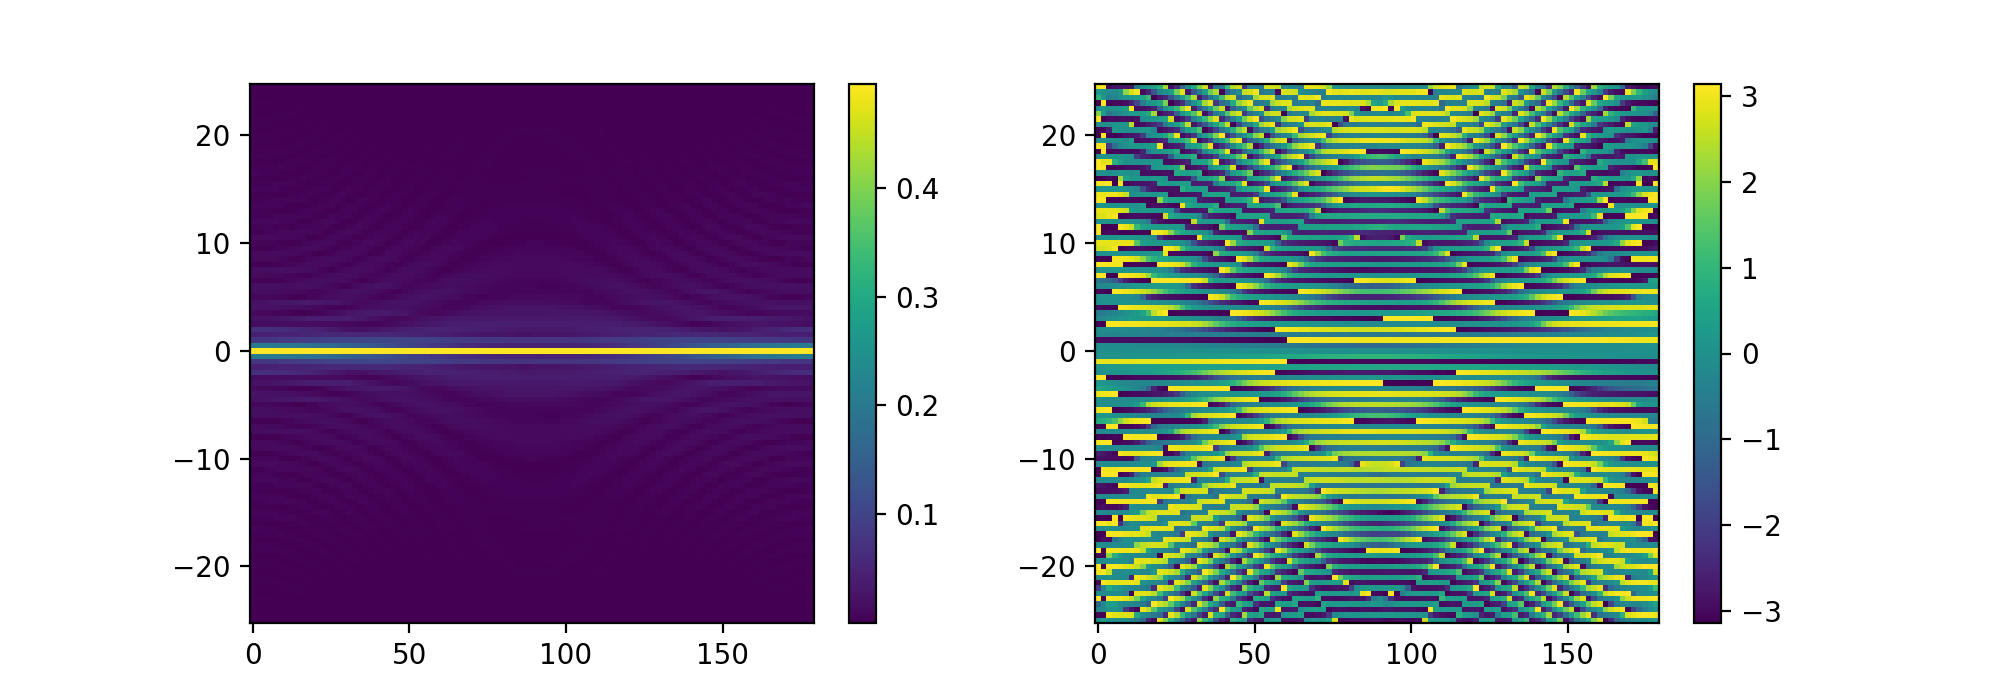

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_ft_grid.imshow(ax[0], np.abs(S_ft_rect_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_ft_grid.imshow(ax[1], np.angle(S_ft_rect_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [16]:
D = S_ft_theory - S_ft_rect_theory

<IPython.core.display.Javascript object>


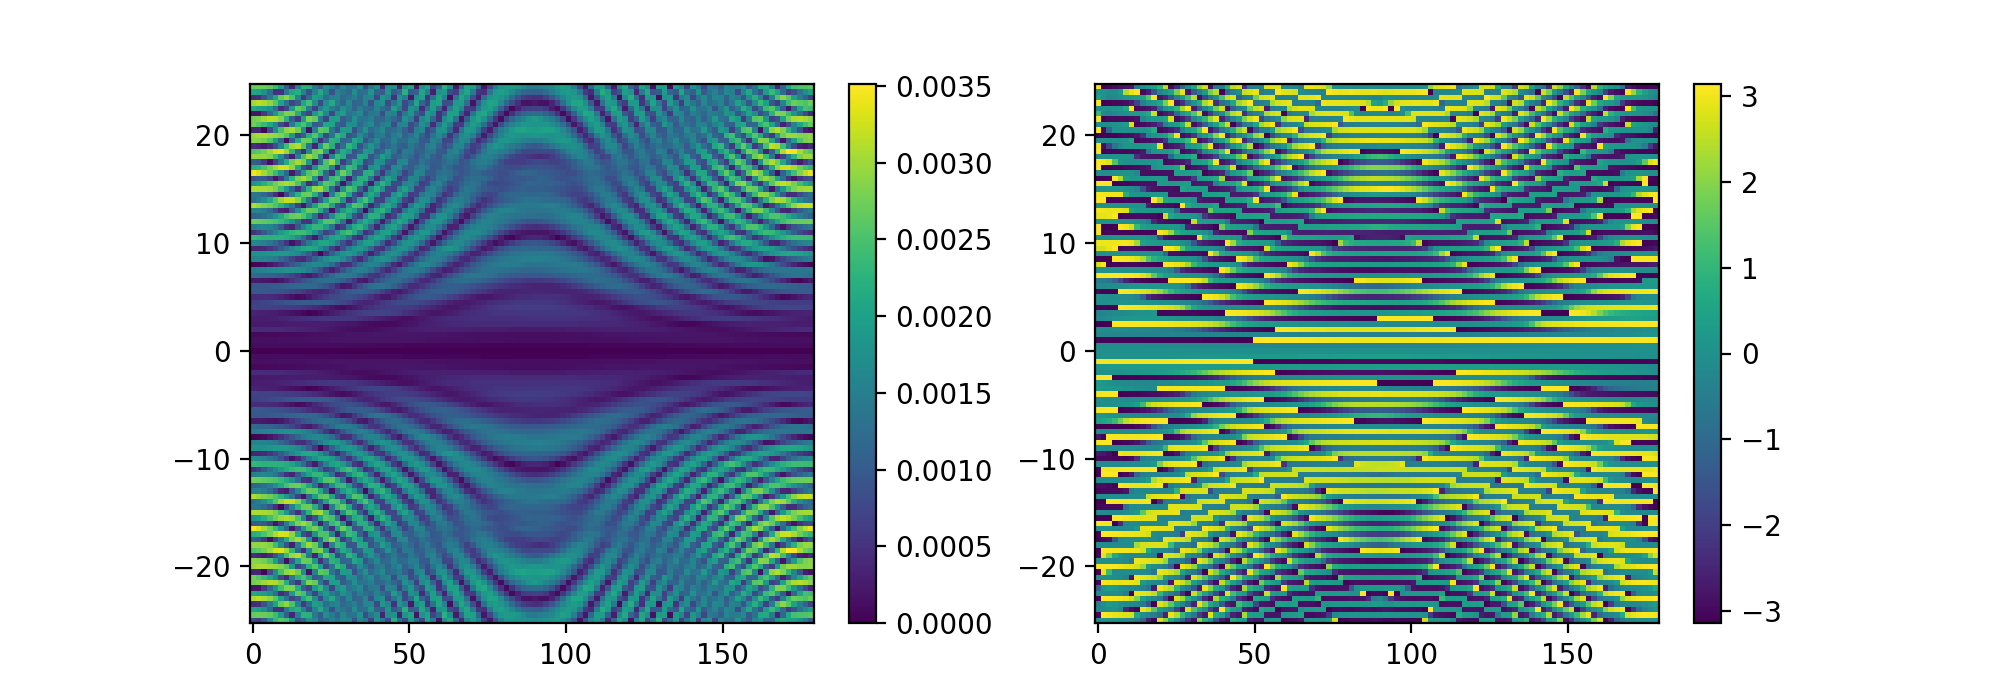

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_ft_grid.imshow(ax[0], np.abs(D), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_ft_grid.imshow(ax[1], np.angle(D), aspect='auto')
fig.colorbar(im, ax=ax[1]);